In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
lifts_raw = pd.read_csv('openpowerlifting.csv')

In [296]:
lifts = lifts_raw.copy()
lifts = lifts[lifts['Place'] != 'DQ']
lifts['Division'] = lifts['Division'].astype(str)
del lifts['Squat4Kg']
del lifts['Bench4Kg']
del lifts['Deadlift4Kg']

#cleaning divisions data
#limitation - Rulebook is from 2021.  Could not find a 2017 copy
#build columns that comprise division.
#Youth 1,2,3 = under 10, 10-11, 12-13
#Teen 1,2,3 = 14-15, 16-17, 18-19
#juniors 20-24
#Masters 1a, 1b, 2a, 2b, 3a, 3b, 4a, 4b, 5a, 5b, 6a, 6b = 25-39, 40-44, 45-49 and so on up to 99

In [297]:
def assign_level(age):
    if age < 14:
        return 'Youth'
    elif age < 20:
        return 'Teen'
    elif age < 25:
        return 'Juniors'
    elif age < 40:
        return 'Open'
    else:
        return 'Masters'

In [298]:
def assign_tier(age):
    if age < 10:
        return str(1)
    elif age < 12:
        return str(2)
    elif age < 14:
        return str(3)
    elif age < 16:
        return str(1)
    elif age < 18:
        return str(2)
    elif age < 20:
        return str(3)
    elif age < 25:
        return np.nan
    elif age < 40:
        return np.nan
    elif age < 45:
        return '1a'
    elif age < 50:
        return '1b'
    elif age < 55:
        return '2a'
    elif age < 60:
        return '2b'
    elif age < 65:
        return '3a'
    elif age < 70:
        return '3b'
    elif age < 75:
        return '4a'
    elif age < 80:
        return '4b'
    elif age < 85:
        return '5a'
    elif age < 90:
        return '5b'
    elif age < 94:
        return '6a'
    else:
        return '6b'

In [299]:
def assign_open_level(division):
    if ('guest' in division.lower() or \
        'disabled' in division.lower() or \
        'novice' in division.lower() or \
        'special' in division.lower() or \
        'amateur' in division.lower()):
        return 'None'
    else:
        return np.nan

In [300]:
lifts['Tier'] = lifts['Age'].apply(assign_tier)

In [301]:
lifts['Level'] = lifts['Age'].apply(assign_level)

In [302]:
lifts['OpenLevel'] = lifts['Division'].apply(assign_open_level)

In [303]:
lifts['OpenLevel'] = lifts['OpenLevel'].fillna(lifts['Level'])

In [304]:
lifts['Level'] = lifts['OpenLevel']
del lifts['OpenLevel']

In [305]:
lifts['Division'] = lifts['Level'] + ' ' + lifts['Tier'].fillna(str(1))
lifts['Division'] = lifts['Division'].str.replace(r'.*None.*', 'None', regex=True)
lifts['Division'] = lifts['Division'].str.replace(r'.*Open.*', 'Open', regex=True)

In [293]:
lifts.to_csv('lifts_data.csv', index=False)

In [ ]:
print(lifts.head())
print(lifts.describe())
print(lifts.info())

In [ ]:
print(lifts.isnull().sum())

In [287]:
print(lifts.duplicated().sum())

8327


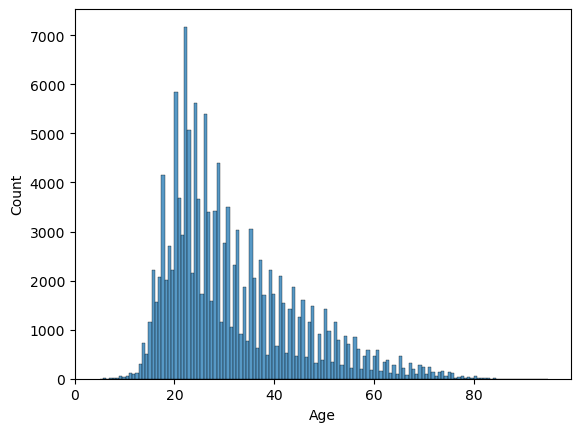

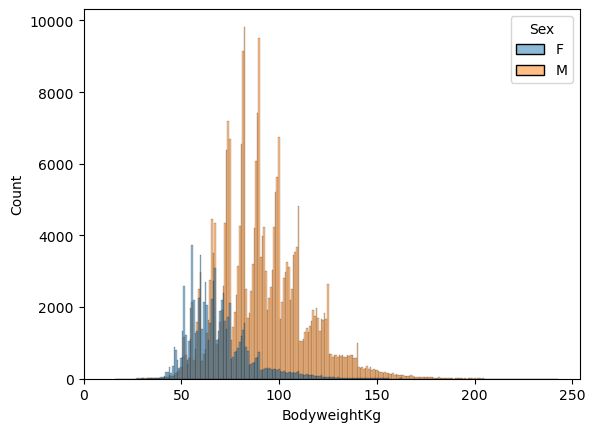

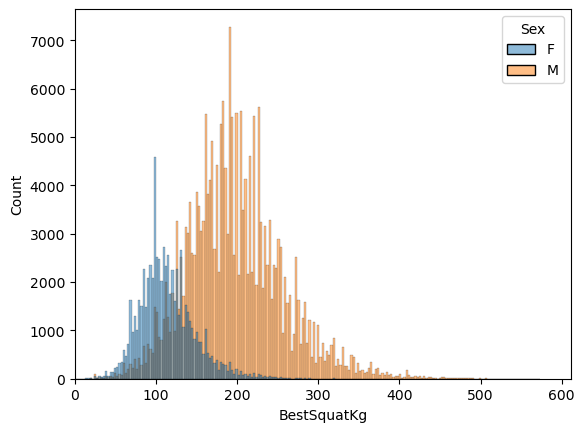

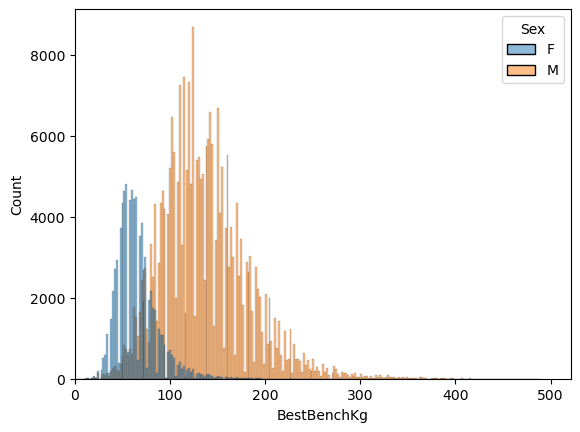

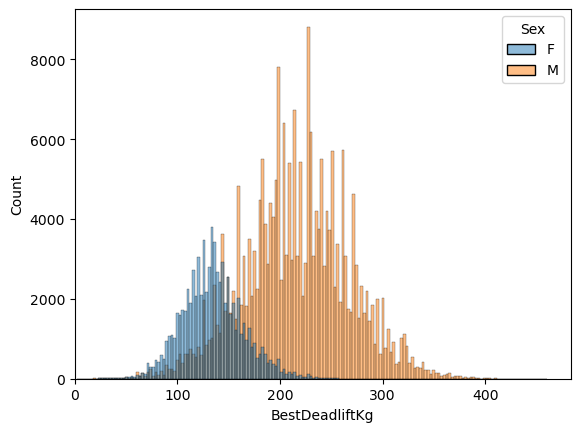

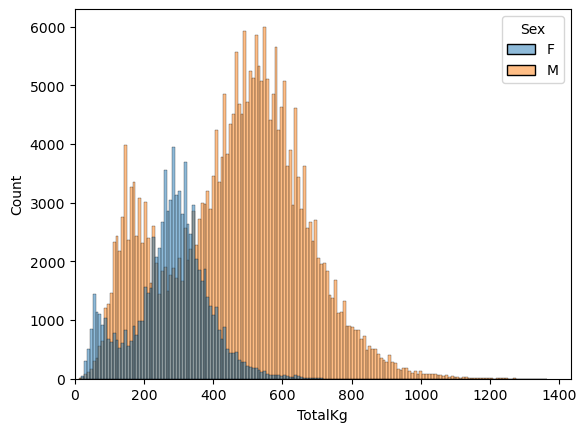

In [288]:
sns.histplot(lifts['Age'])
plt.xlim(left=0)
plt.show()

sns.histplot(data=lifts, x='BodyweightKg', hue='Sex')
plt.xlim(left=0)
plt.show()

sns.histplot(data=lifts, x='BestSquatKg', hue='Sex')
plt.xlim(left=0)
plt.show()

sns.histplot(data=lifts, x='BestBenchKg', hue='Sex')
plt.xlim(left=0)
plt.show()

sns.histplot(data=lifts, x='BestDeadliftKg', hue='Sex')
plt.xlim(left=0)
plt.show()

sns.histplot(data=lifts, x='TotalKg', hue='Sex')
plt.xlim(left=0)
plt.show()

Explore the Bi-modality

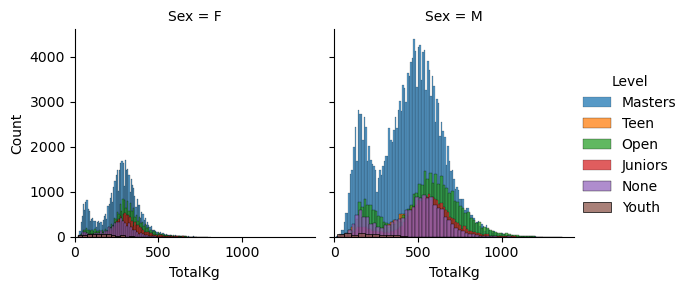

In [289]:
# create two separate histograms for males and females
g = sns.FacetGrid(lifts, col='Sex', hue='Level')
g.map(sns.histplot, 'TotalKg')
g.set(xlim=(0, None))
g.add_legend()

In [312]:
#test for lifting div differences
print(lifts.groupby('Division')['TotalKg'].describe())
print(lifts.groupby('Level')['TotalKg'].describe())
print(lifts.groupby('Level')['BestSquatKg'].describe())


               count        mean         std    min      25%      50%  \
Division                                                                
Juniors 1    31924.0  474.730568  185.562125  27.50  322.500  495.000   
Masters 1a   10080.0  396.882188  212.245838  27.22  226.800  350.000   
Masters 1b    7426.0  371.439461  205.989049  25.00  200.000  315.000   
Masters 2a    5687.0  348.467176  201.731163  30.00  187.500  290.000   
Masters 2b    3742.0  330.715617  187.519296  32.50  172.500  282.500   
Masters 3a    2348.0  290.899246  165.952531  27.50  150.000  242.500   
Masters 3b    1621.0  263.755780  152.515388  30.00  137.500  217.500   
Masters 4a    1118.0  233.480483  141.257533  20.00  117.930  181.970   
Masters 4b     437.0  208.013959  124.416659  27.50  105.000  165.000   
Masters 5a     111.0  183.155856  111.173074  30.00   96.250  147.500   
Masters 5b      10.0  141.084000  105.066156  62.50   78.630  101.250   
Masters 6a       3.0  276.666667  198.845627  92.50

Rule out bimodality due to a certian division.

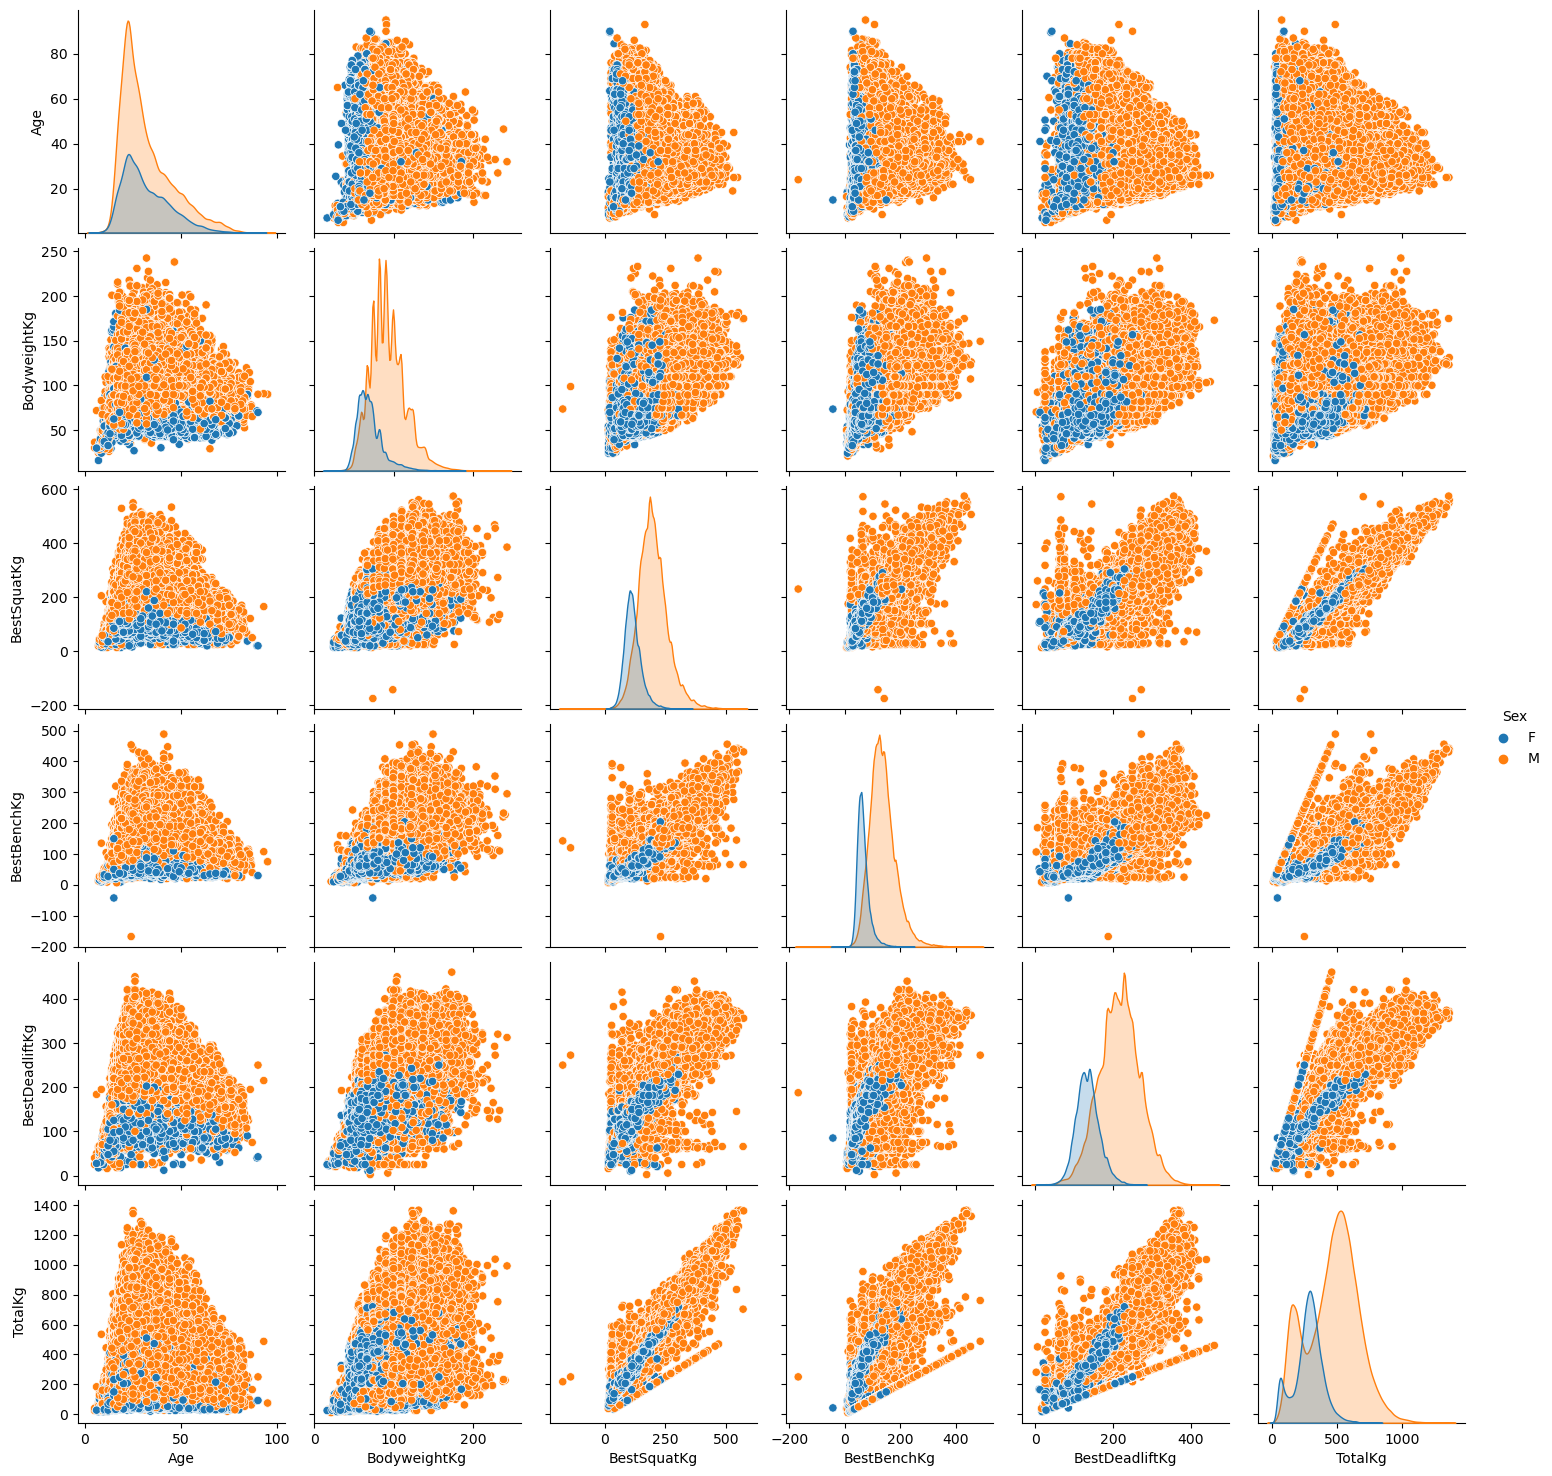

In [308]:
sns.pairplot(lifts[['Age','BodyweightKg', 'BestSquatKg', 'BestBenchKg', 'BestDeadliftKg', 'TotalKg', 'Sex']], hue='Sex')
plt.show()

In [ ]:
corr_matrix = lifts[['Age', 'BodyweightKg', 'BestSquatKg', 'BestBenchKg', 'BestDeadliftKg', 'TotalKg', 'Wilks']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
print(lifts['Sex'].value_counts())
print(lifts['Equipment'].value_counts())
print(lifts['Division'].value_counts())
print(lifts['WeightClassKg'].value_counts())

In [ ]:
categorical_vars = ['Sex', 'Equipment', 'Division', 'WeightClassKg']
target_var1 = 'Place'
target_var2 = 'TotalKg'

In [ ]:
for var in categorical_vars:
    ct = pd.crosstab(lifts[var], lifts[target_var1])
    chi2, p, dof, expected = stats.chi2_contingency(ct)
    print(f"{var}: chi-square = {chi2:.2f}, p-value = {p:.4f}")

In [ ]:
for var in categorical_vars:
    ct = pd.crosstab(lifts[var], lifts[target_var2])
    chi2, p, dof, expected = stats.chi2_contingency(ct)
    print(f"{var}: chi-square = {chi2:.2f}, p-value = {p:.4f}")

In [306]:
#because missing a lift impacts total
complete_lifts = lifts.dropna(subset=['BestSquatKg', 'BestBenchKg', 'BestDeadliftKg'])

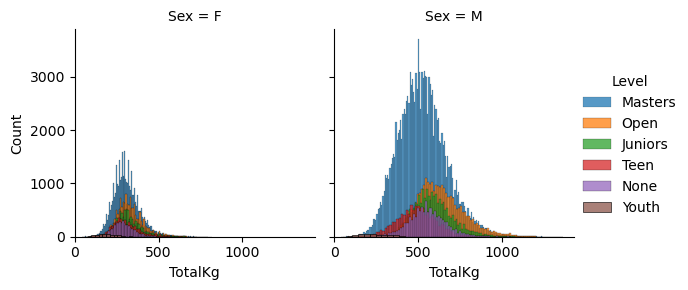

In [307]:
# create two separate histograms for males and females
g = sns.FacetGrid(complete_lifts, col='Sex', hue='Level')
g.map(sns.histplot, 'TotalKg')
g.set(xlim=(0, None))
g.add_legend()

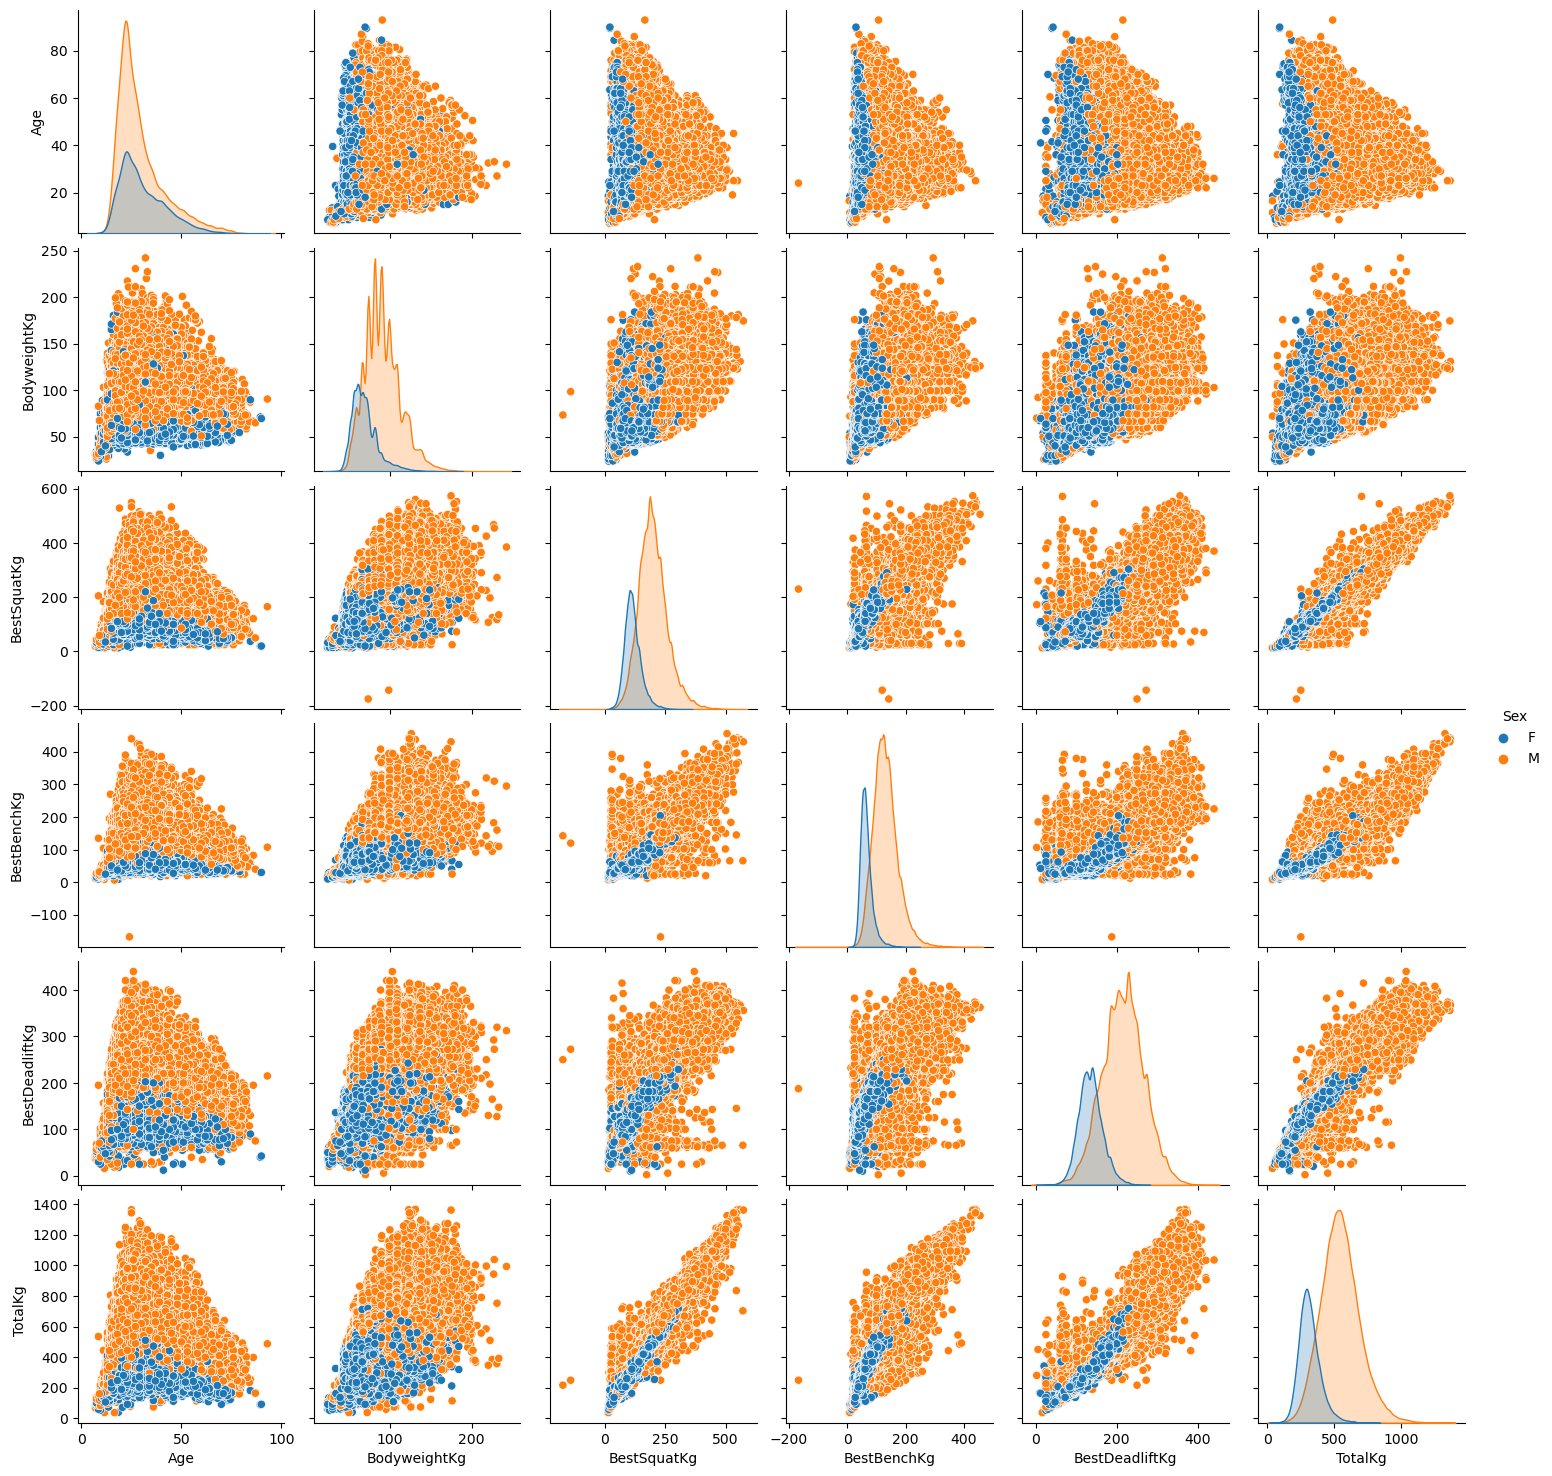

In [309]:
sns.pairplot(complete_lifts[['Age','BodyweightKg', 'BestSquatKg', 'BestBenchKg', 'BestDeadliftKg', 'TotalKg', 'Sex']], hue='Sex')
plt.show()